In [40]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [41]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [42]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)
print()
print('X_test shape:', x_test.shape)
print('Y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [56]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
Y_train = keras.utils.to_categorical(y_train, num_classes) #inizialmente le label sono la cifra, lo voglio trasformare in vettore di bit di cui quello acceso è quello con indice la cifra (cioè quello che sarà output rete)
Y_test = keras.utils.to_categorical(y_test, num_classes)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

(28, 28, 1)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dropout per limitare overfitting
from keras.layers import Flatten, Conv2D, AveragePooling2D


def create_model():
    #instantiate model
    #model = Sequential()
    #Convolutional
    ##in: 28x28x1
    #model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    ##out: 24x24x6, in:
    #model.add(MaxPooling2D(pool_size=(2,2)))
    ##out: 12x12x6, in:
    #model.add(Dropout(0.1))
    #model.add(Conv2D(16, kernel_size=(5,5)))
    ##out: 8x8x16, in:
    #model.add(MaxPooling2D(pool_size=(2,2)))
    ##out: 4x4x16, in:
    #Deep
    #model.add(Flatten())
    #model.add(Dropout(0.1))
    #model.add(Dense(256, activation='relu'))
    #model.add(Dense(256, activation='relu'))
    #model.add(Dense(num_classes, activation='softmax'))
    model = Sequential()
    model.add(Conv2D(num_classes, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Conv2D(num_classes, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    return model

In [54]:
from keras.optimizers import SGD, RMSprop, Adam, Nadam, Adagrad, Adadelta, Adamax

def compile_model(opt_function):
    # create the model
    model=create_model()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt_function,
                  metrics=['acc'])
    return model

In [58]:
model_CNN=compile_model(Adam())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 12, 12, 10)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 10)         0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 5, 5, 10)         

In [64]:
RERUN=True
epochs = 5

if(RERUN):
    batch_size = 32 
    history = model_CNN.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_test, Y_test))
    import pandas as pd
    print("Storing model and history")
    path = "store/122-"
    path_history = path+"history.csv"
    path_model = path+"model.tf"
        
    model_CNN.save(filepath=path_model, include_optimizer=True)  
    df  = pd.DataFrame(history.history) 
    with open(path_history, mode='w') as file:
        df.to_csv(file)
    print()


Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1064 - acc: 0.9673 - val_loss: 0.0564 - val_acc: 0.9824
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1057 - acc: 0.9678 - val_loss: 0.0493 - val_acc: 0.9833
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0999 - acc: 0.9686 - val_loss: 0.0502 - val_acc: 0.9847
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1004 - acc: 0.9703 - val_loss: 0.0526 - val_acc: 0.9836
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1002 - acc: 0.9697 - val_loss: 0.0599 - val_acc: 0.9822
Storing model and history


INFO:tensorflow:Assets written to: store/122-model.tf/assets


INFO:tensorflow:Assets written to: store/122-model.tf/assets


313/313 [==============================] - 4s 10ms/step - loss: 0.0547 - acc: 0.9827


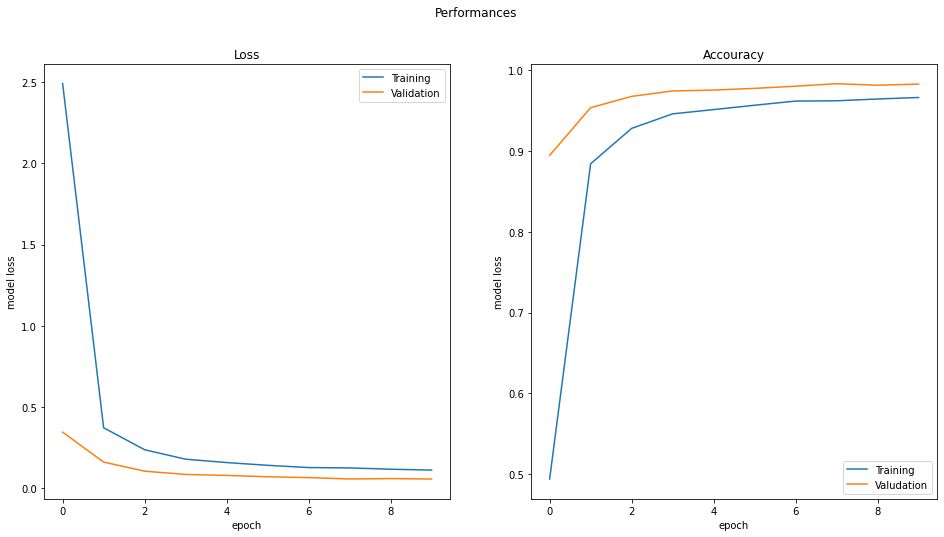

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

plt.figure(figsize=(16, 8))
plt.suptitle("Performances")

path = "store/122-"
model_CNN=load_model(path+"model.tf")
history = pd.read_csv(path+"history.csv")
    
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

plt.subplot(121)
plt.plot(range(0, epochs), history.loc[:,"loss"],label="Training")
plt.plot(range(0, epochs), history.loc[:,"val_loss"],label="Validation")
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Loss')
plt.legend()

plt.subplot(122)
plt.plot(range(0, epochs), history.loc[:,"acc"], label="Training")
plt.plot(range(0, epochs), history.loc[:,"val_acc"],label="Valudation")
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Accouracy')
plt.legend()

plt.show()


1/1 [==============================] - 0s 36ms/step
[[2.5271040e-03 9.5675904e-01 6.9047329e-03 5.7155348e-04 7.3496606e-03
  5.0632242e-04 6.0667763e-03 9.8460345e-03 4.9675354e-03 4.5012101e-03]]


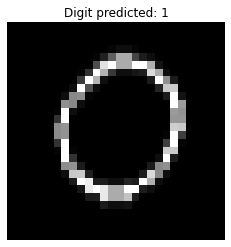

1/1 [==============================] - 0s 35ms/step
[[2.3537008e-03 9.5739055e-01 6.6001853e-03 6.4866152e-04 7.3743840e-03
  5.5615109e-04 5.7657752e-03 9.3945060e-03 5.5306088e-03 4.3854569e-03]]


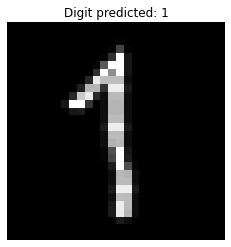

1/1 [==============================] - 0s 33ms/step
[[2.2226954e-03 9.5636755e-01 6.7310971e-03 6.3510204e-04 8.1426585e-03
  5.5777264e-04 5.3895316e-03 9.5071308e-03 5.5604605e-03 4.8859403e-03]]


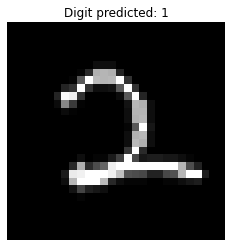

1/1 [==============================] - 0s 39ms/step
[[2.3558442e-03 9.5620626e-01 6.9067646e-03 6.2745187e-04 8.3135208e-03
  5.4910983e-04 5.7661585e-03 9.1417385e-03 5.4786098e-03 4.6546692e-03]]


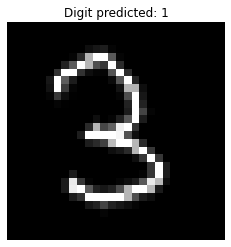

1/1 [==============================] - 0s 67ms/step
[[2.2820863e-03 9.5931005e-01 6.1554895e-03 5.5487227e-04 6.9378624e-03
  4.7570450e-04 5.6477971e-03 9.2247277e-03 5.1111891e-03 4.3001799e-03]]


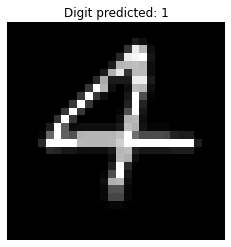

1/1 [==============================] - 0s 45ms/step
[[2.3165368e-03 9.5929831e-01 6.1894734e-03 5.5559678e-04 7.2868983e-03
  5.0525076e-04 5.7452298e-03 9.2727682e-03 4.8305644e-03 3.9994232e-03]]


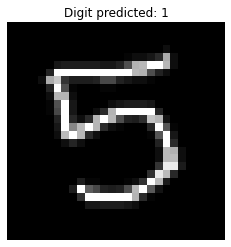

1/1 [==============================] - 0s 50ms/step
[[2.60529225e-03 9.51618671e-01 6.92139054e-03 6.45402062e-04
  8.85306951e-03 5.93269186e-04 6.65751845e-03 1.05047515e-02
  6.22811681e-03 5.37246279e-03]]


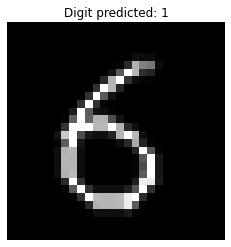

1/1 [==============================] - 0s 84ms/step
[[2.4088519e-03 9.5760560e-01 7.1397764e-03 6.2405266e-04 7.2501712e-03
  4.9595587e-04 5.9517827e-03 9.1245398e-03 5.0948658e-03 4.3043192e-03]]


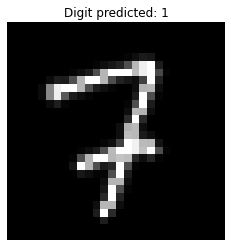

1/1 [==============================] - 0s 39ms/step
[[2.5506974e-03 9.5618194e-01 6.6561736e-03 6.0327176e-04 7.7866139e-03
  5.2288146e-04 6.4158603e-03 9.4088912e-03 5.3947205e-03 4.4790087e-03]]


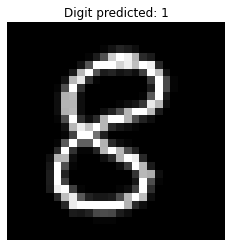

1/1 [==============================] - 0s 42ms/step
[[2.4162640e-03 9.5658743e-01 6.4108330e-03 5.9177616e-04 8.1438869e-03
  5.4308964e-04 5.4542227e-03 9.7142207e-03 5.4974696e-03 4.6408242e-03]]


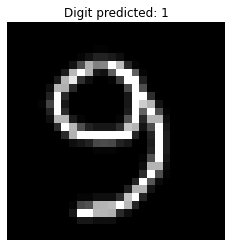

In [65]:
from PIL import Image

for digit in range(10):
    digit_in = Image.open(f"in/{digit}.png").convert('L')
    ydim, xdim = digit_in.size
  
    pix=digit_in.load();
    
    if keras.backend.image_data_format() == 'channels_first':
        img = np.zeros((1, ydim, xdim))
        for j in range(ydim):
            for i in range(xdim):
                img[0, i, j] = pix[j,i]
    else:
        img = np.zeros((ydim, xdim, 1))
        for j in range(ydim):
            for i in range(xdim):
                img[i, j, 0] = pix[j,i]
    img /= 255
    pred = model_CNN.predict(img[None])
    plt.imshow(img, cmap='gray')    
    plt.title(f"Digit predicted: {np.argmax(pred)}")
    plt.axis('off') 
    print(pred)
    plt.show()